In [1]:
import os
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
import sys
from pathlib import Path

In [2]:
sys.path.append(str(Path().resolve().parent))
from path_manager import TRAIN_DATA_NB, VEL_DATA_DIR, TEST_DATA_NB, PLOT_DIR

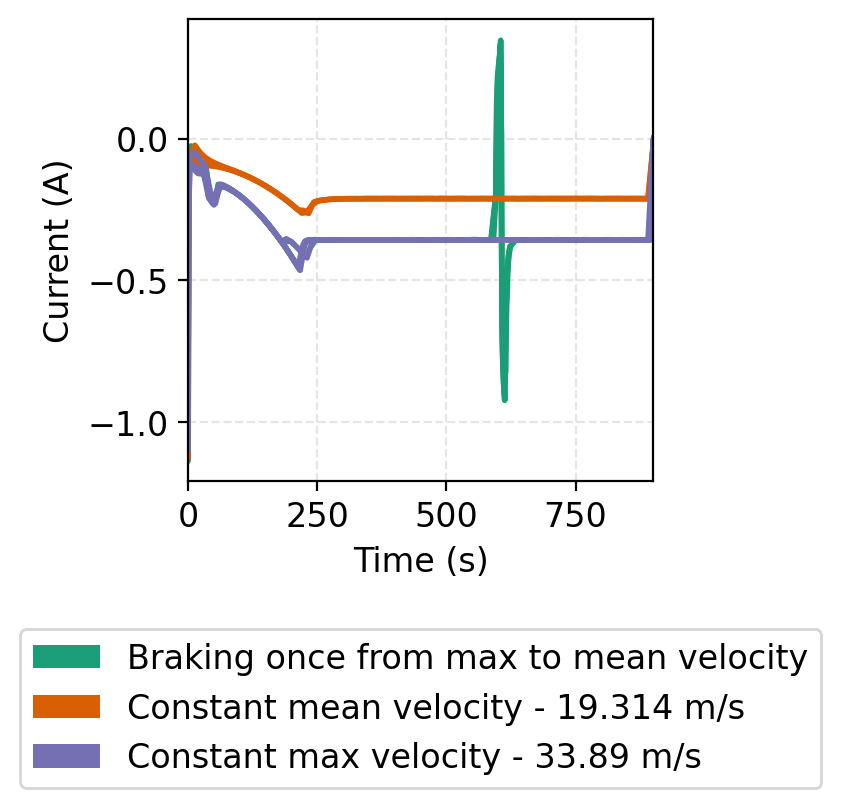

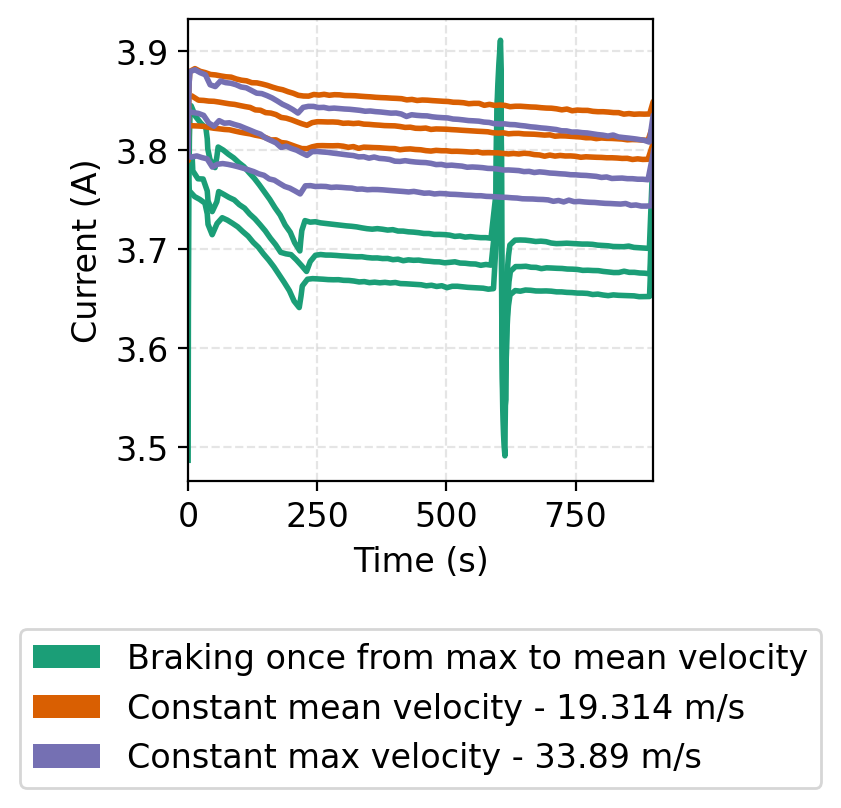

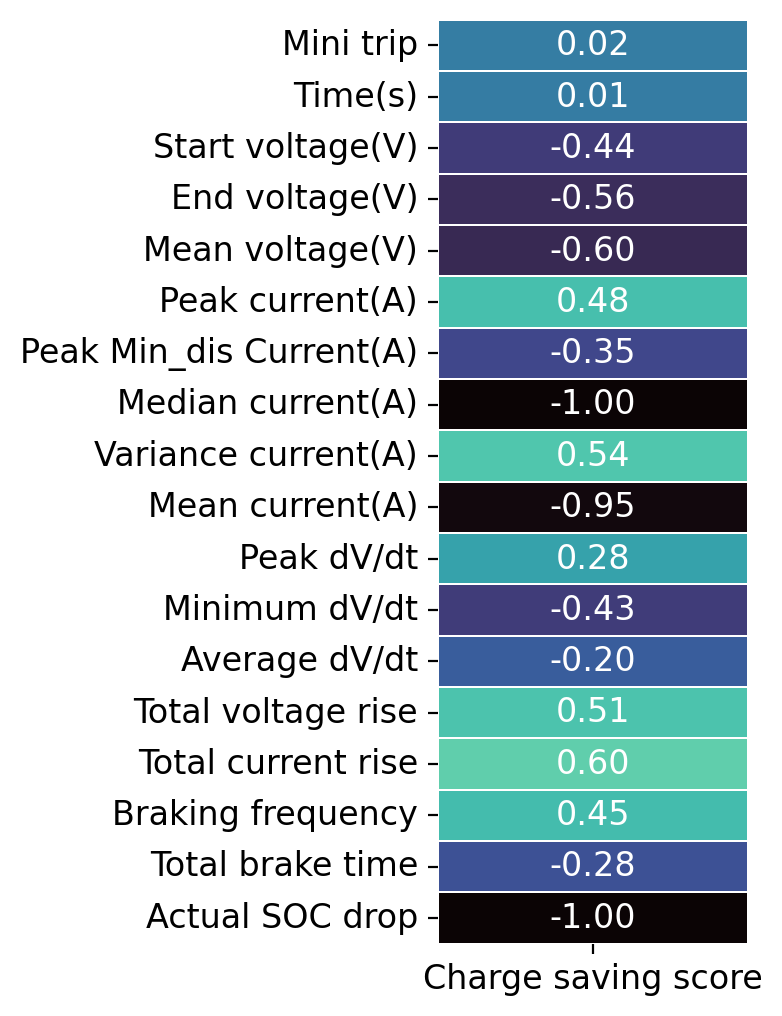

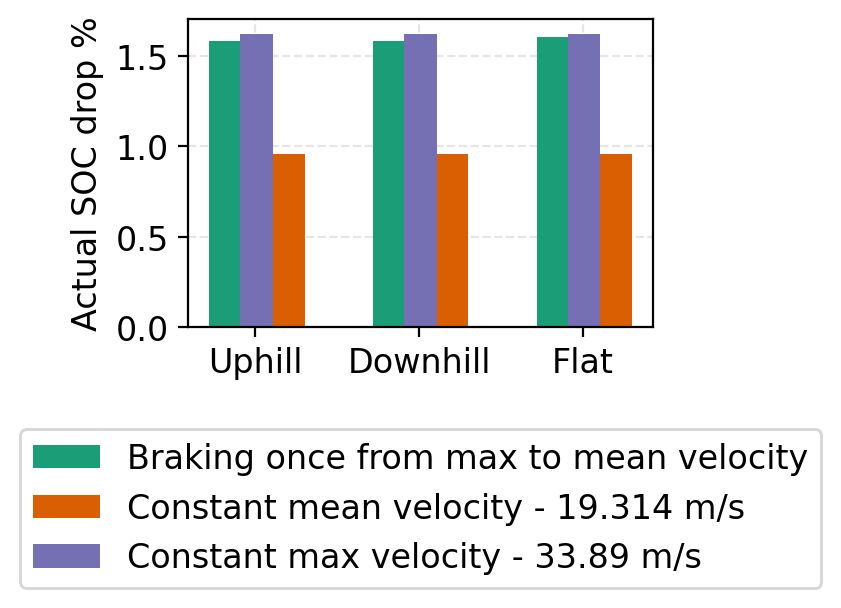

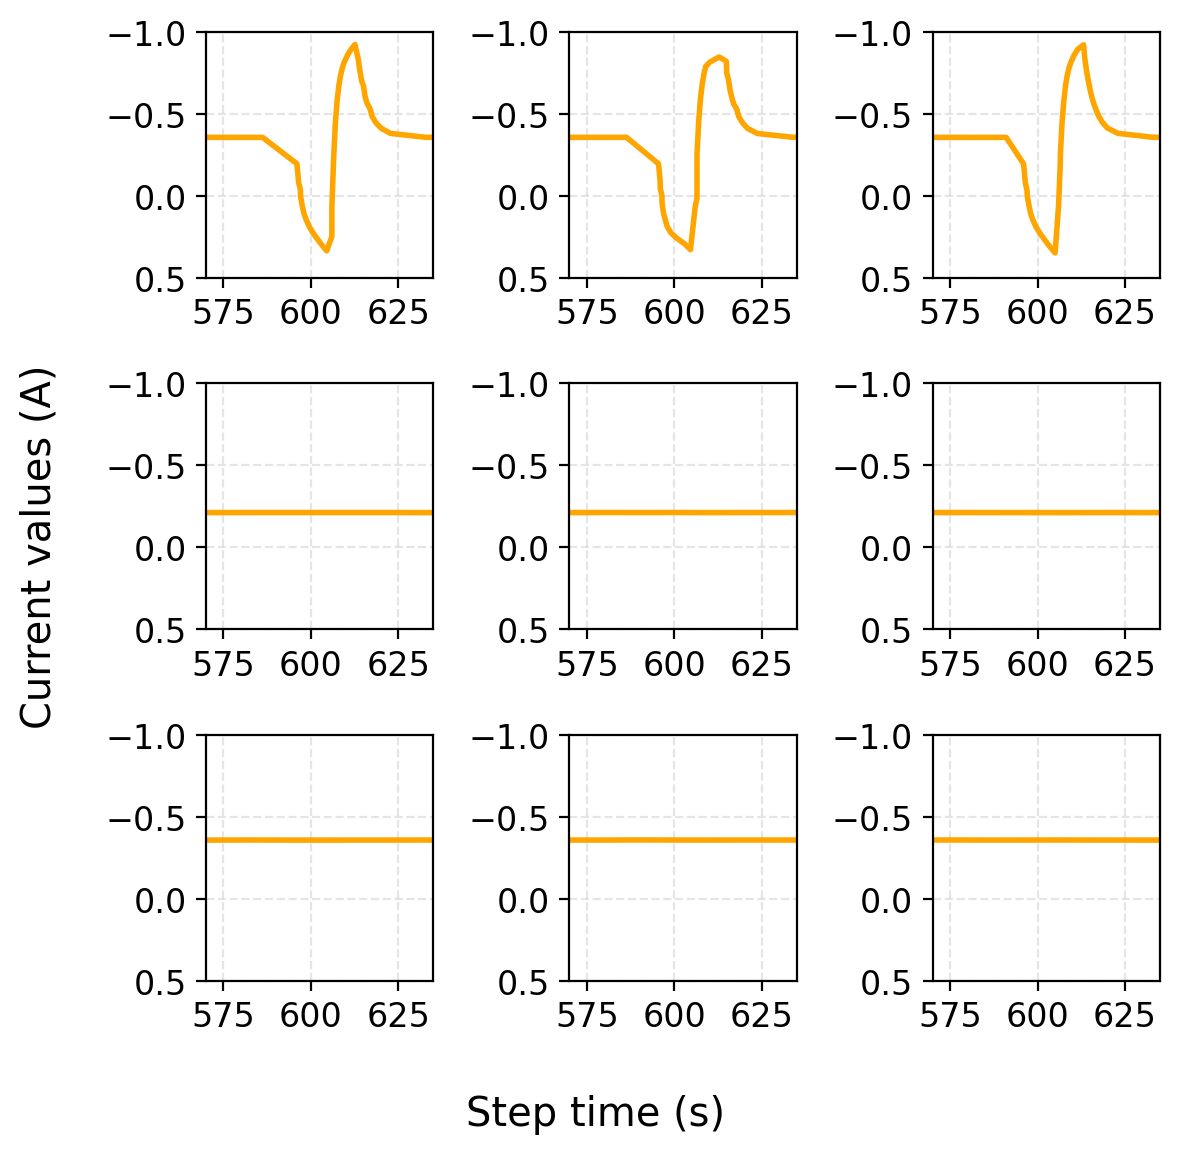

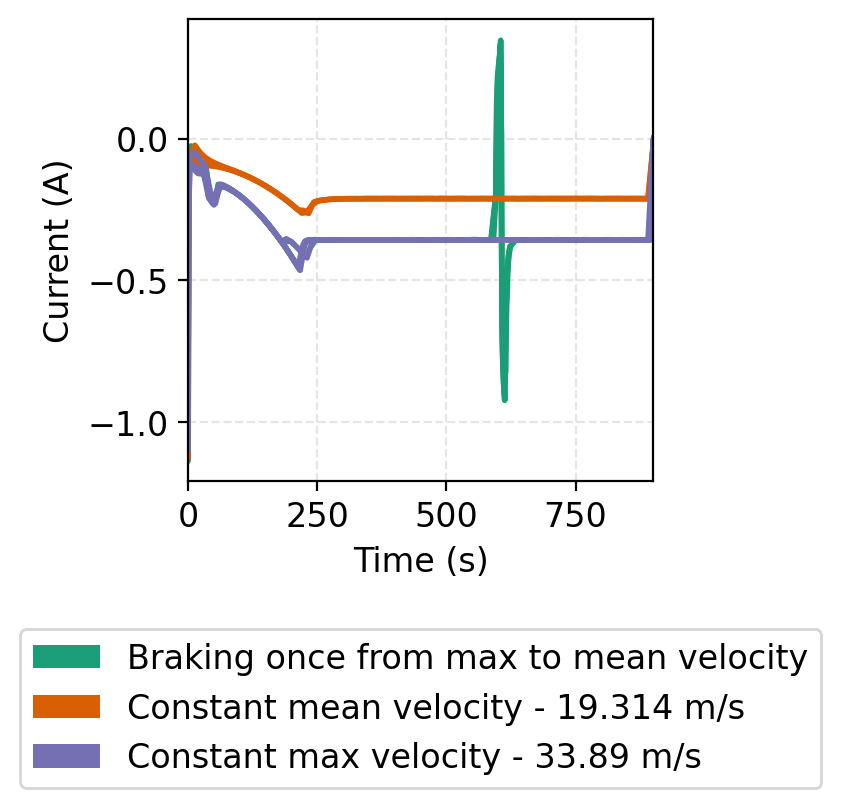

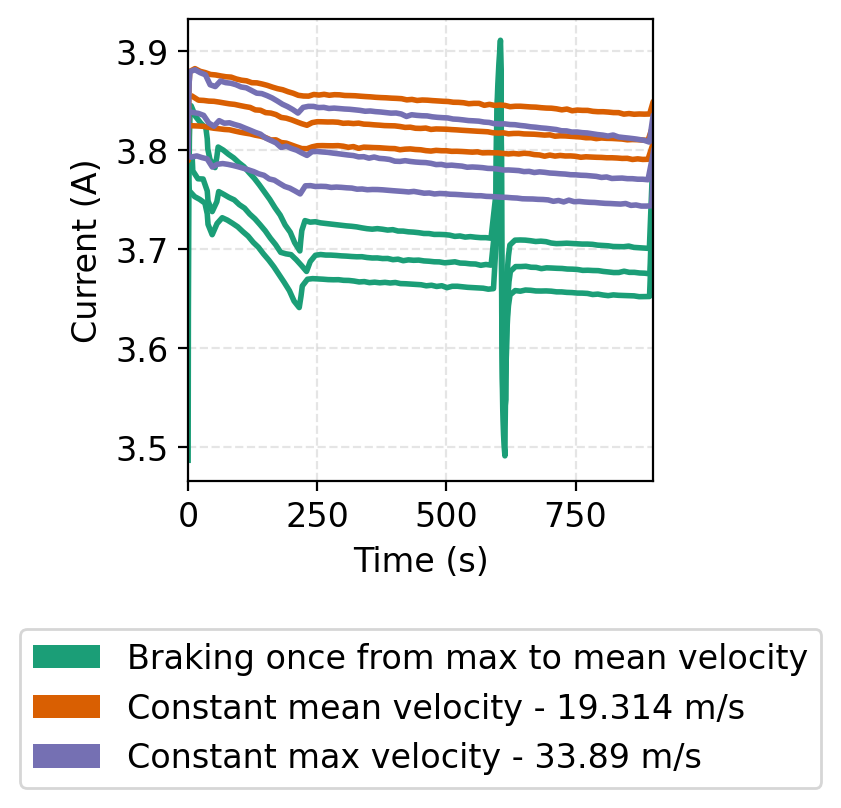

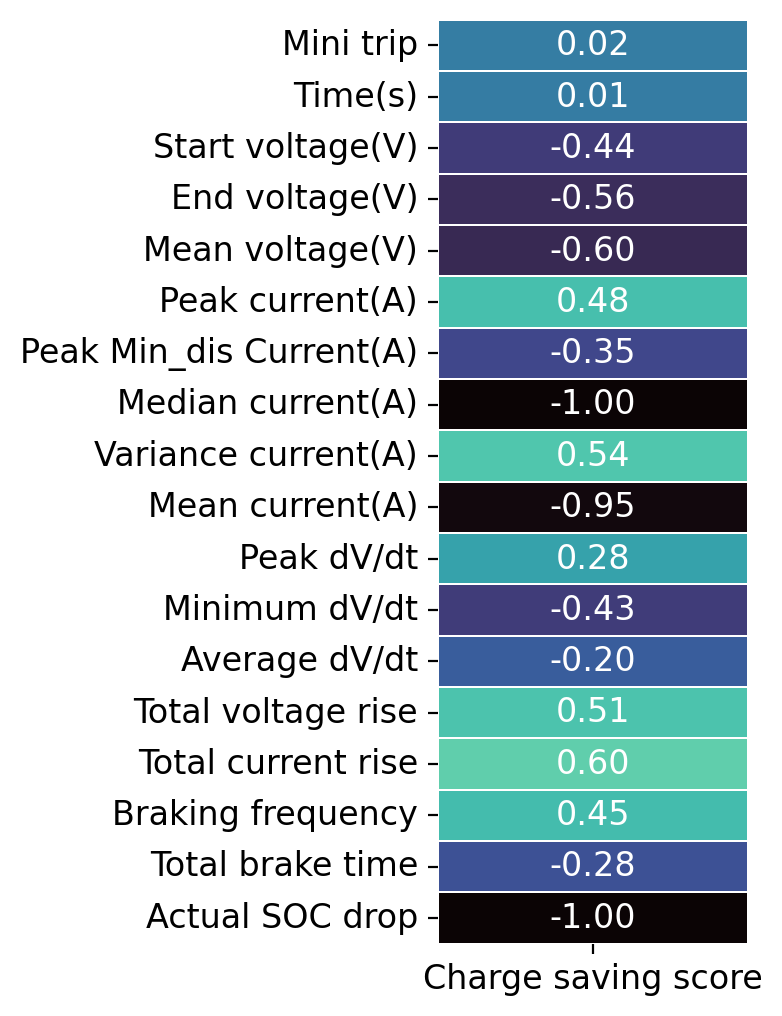

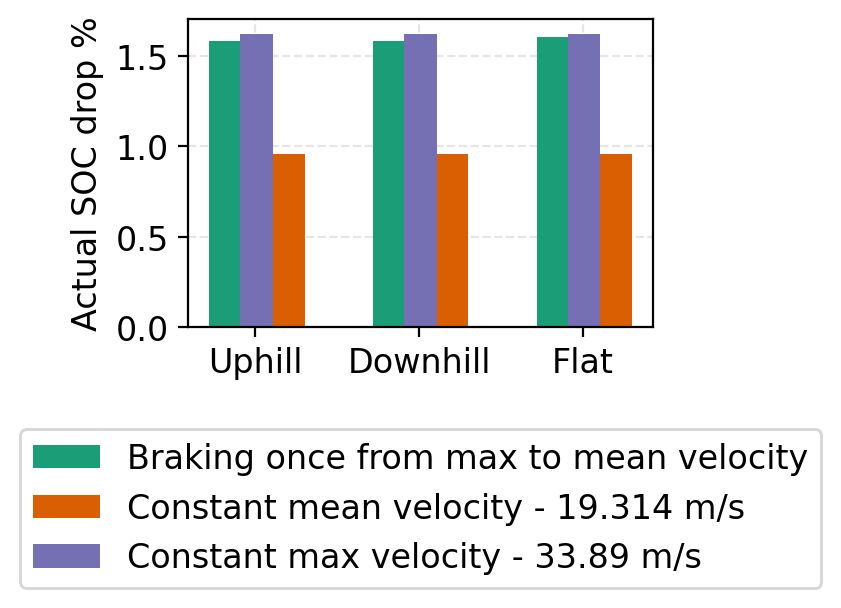

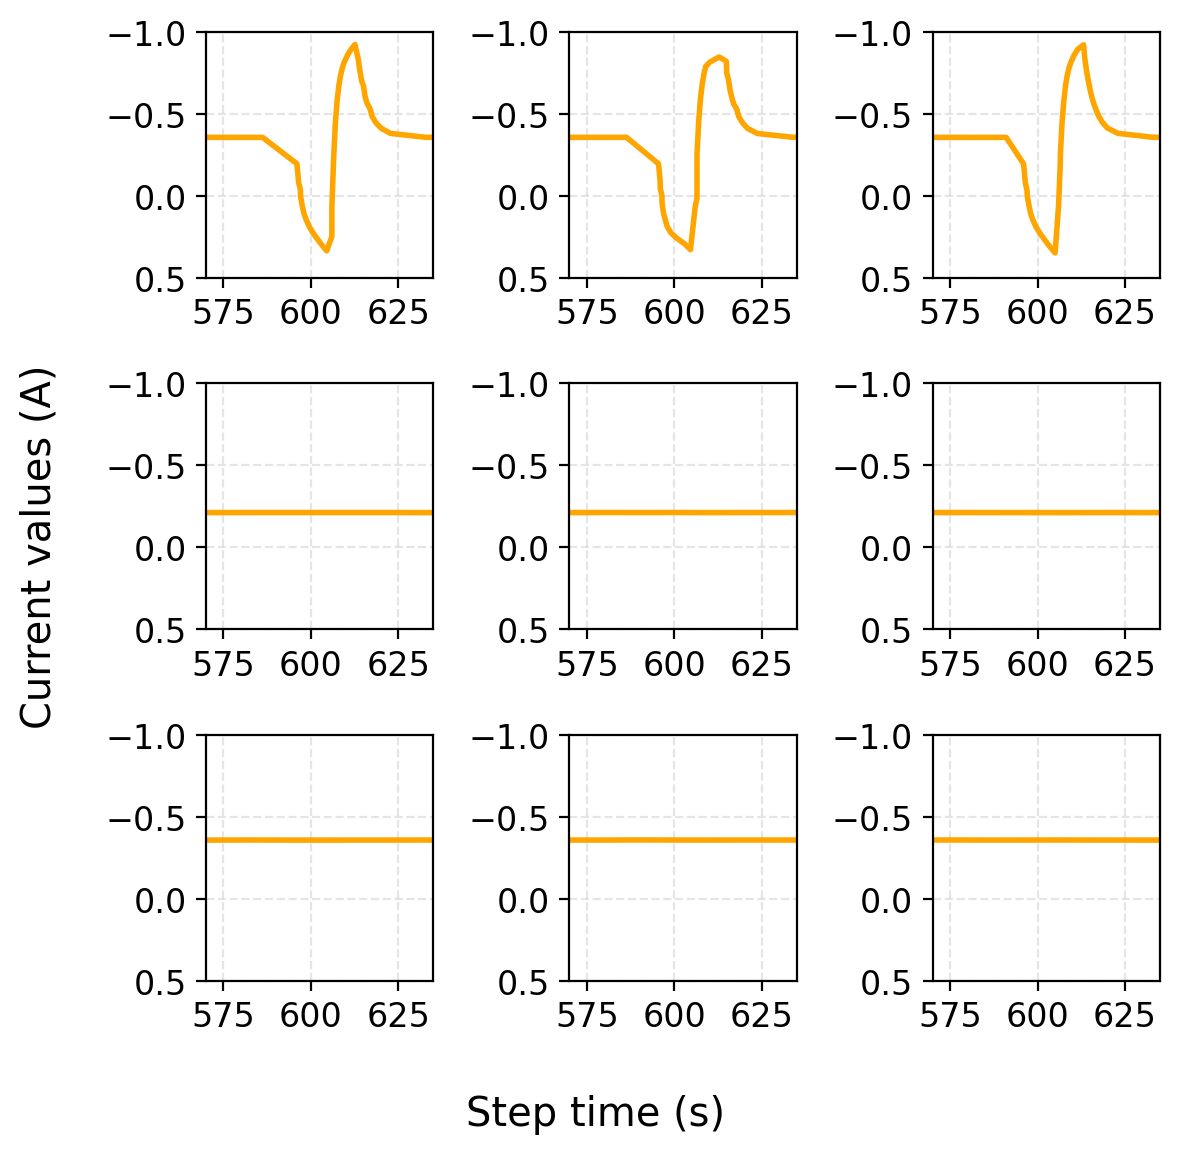

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/32172

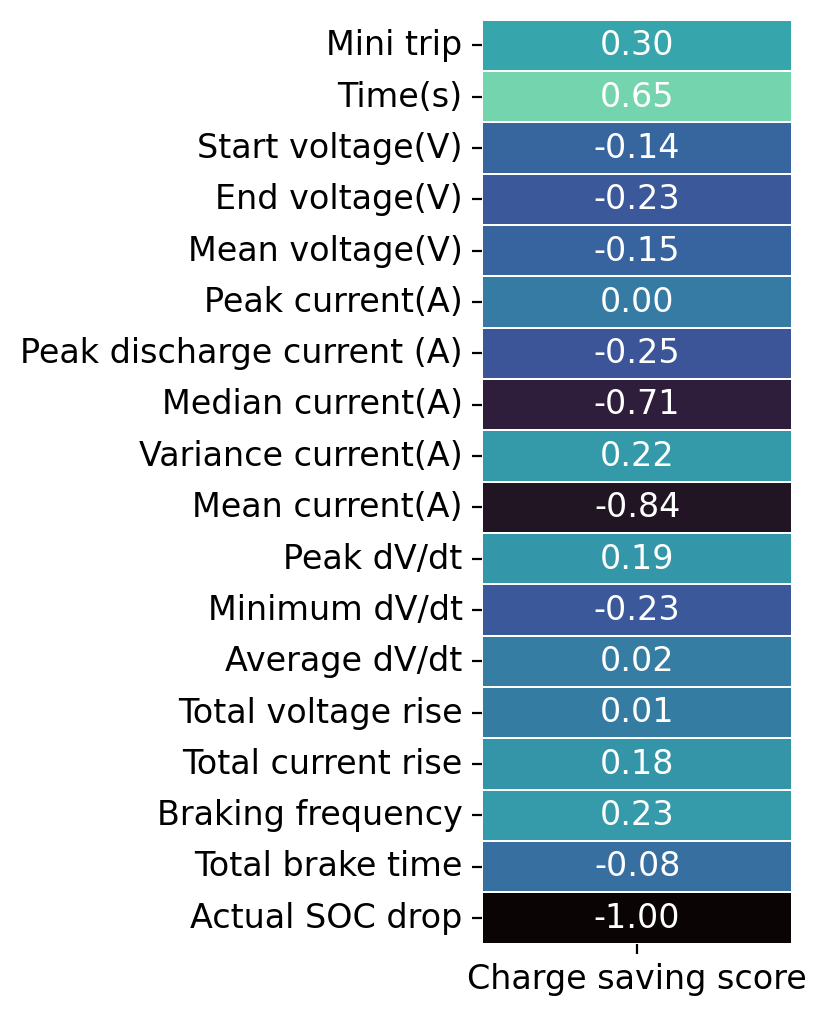

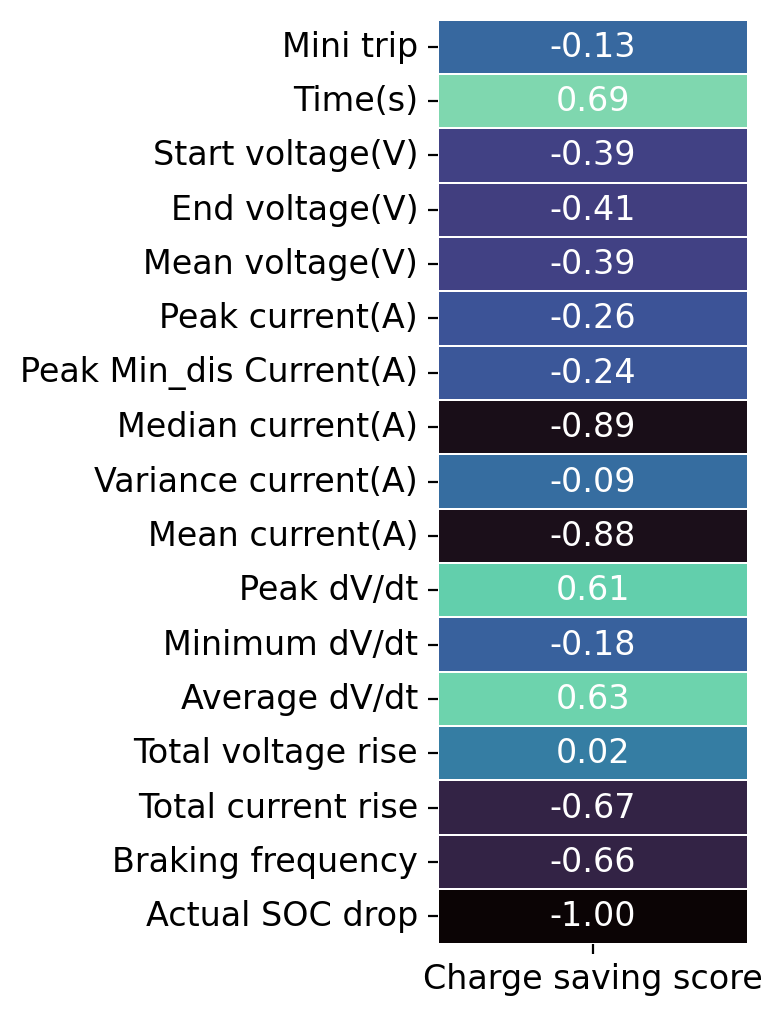

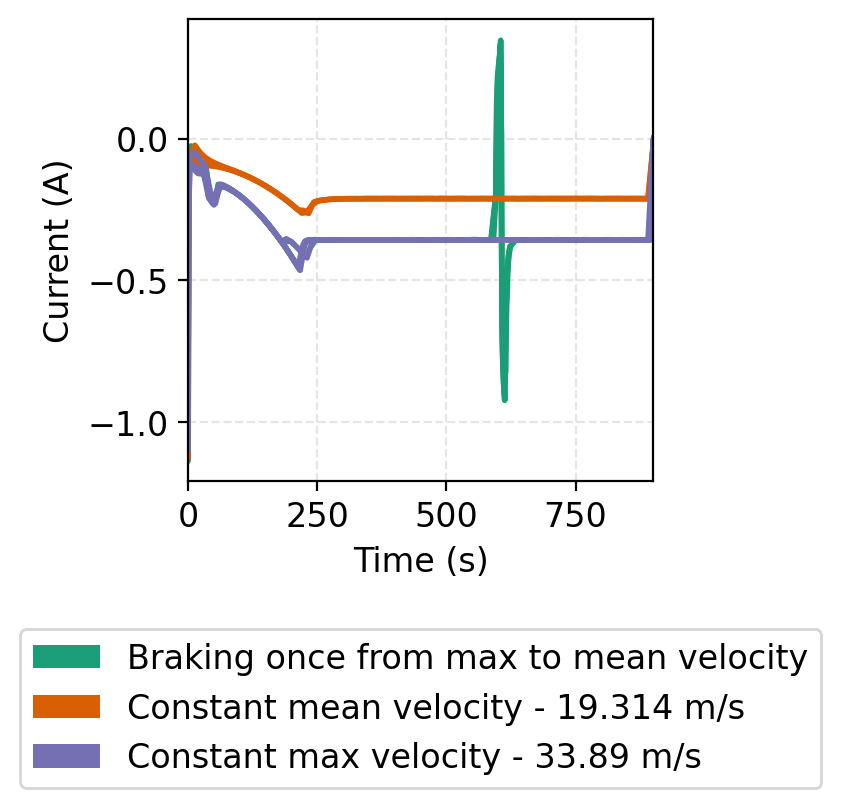

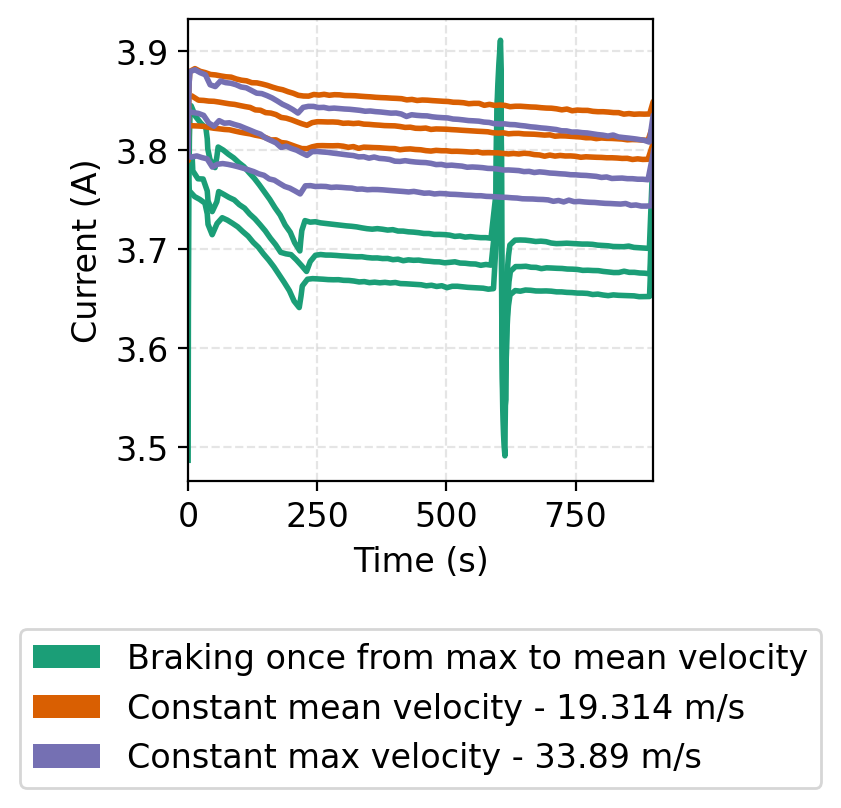

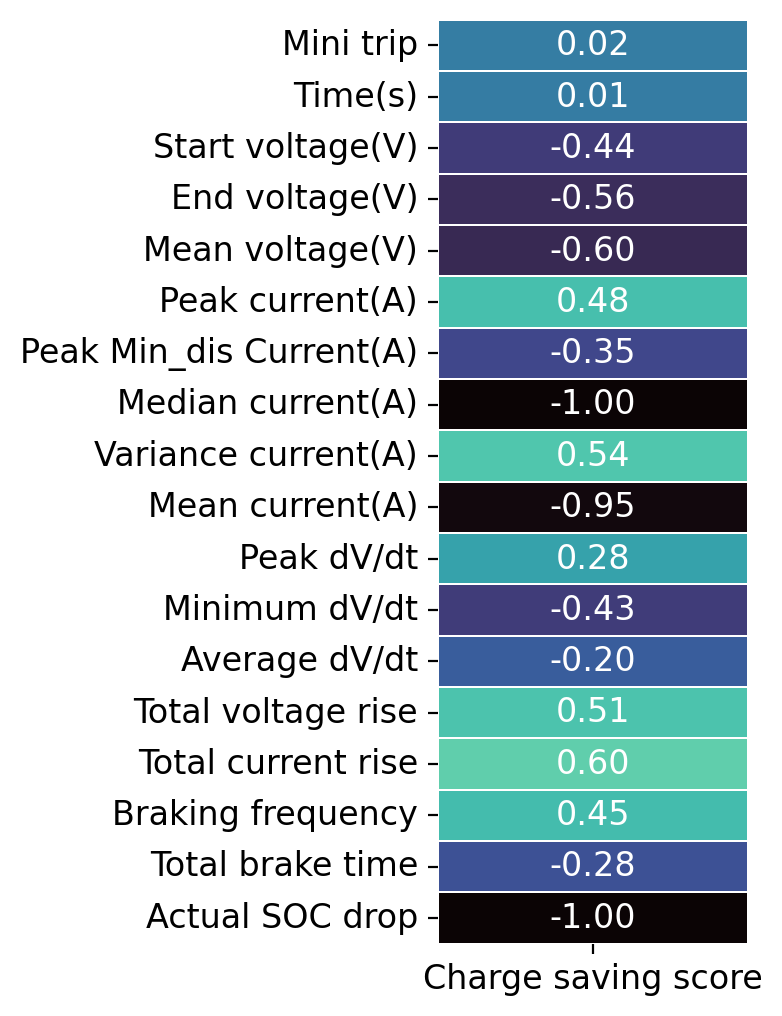

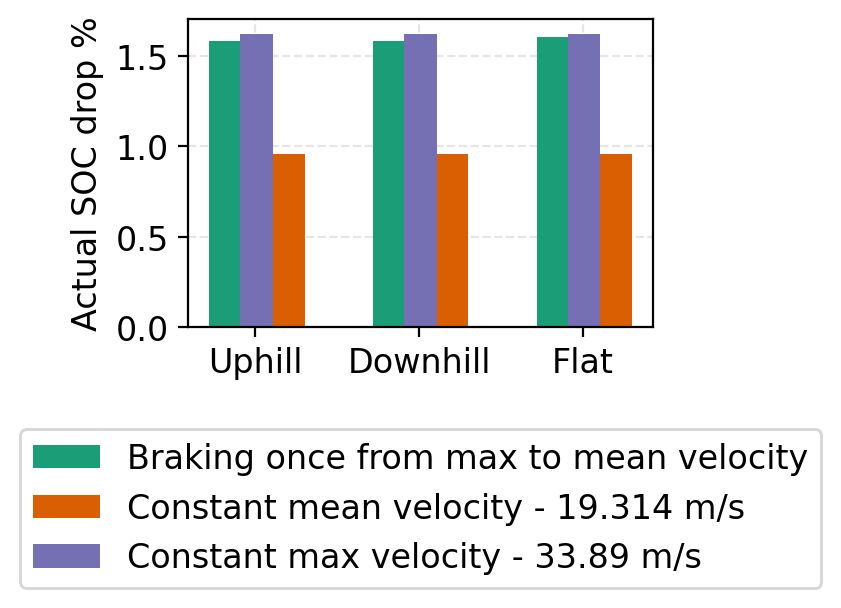

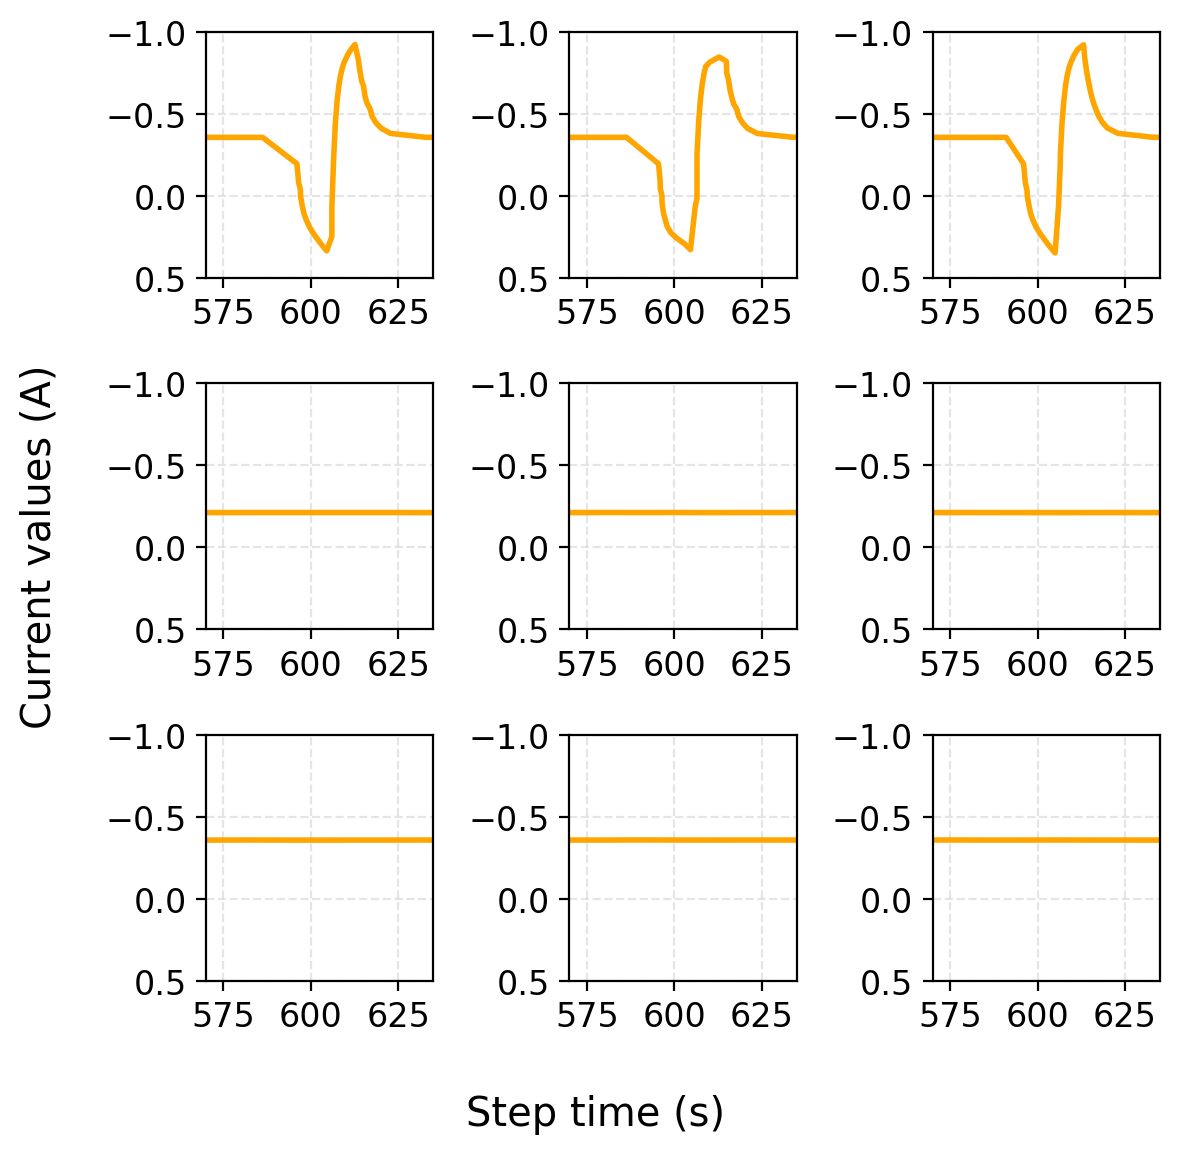

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/32172

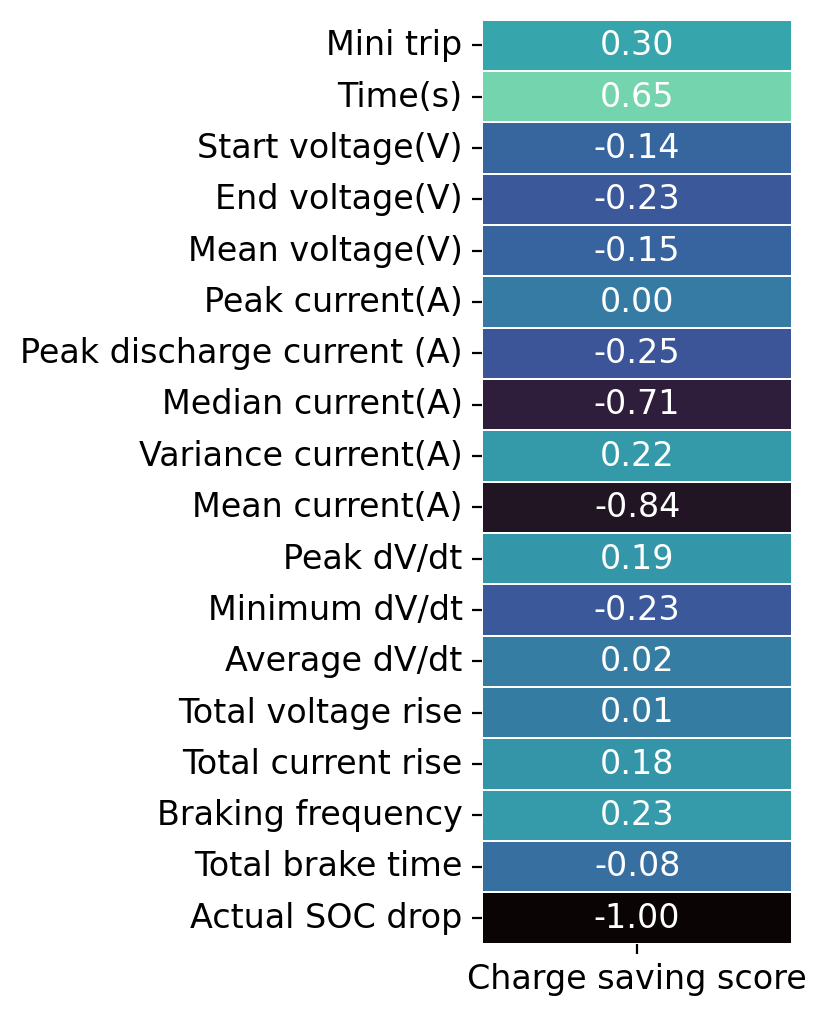

In [3]:
%run {TEST_DATA_NB}
%run {TRAIN_DATA_NB}

In [4]:
def comp_charge_dis(df):
    charge=0
    dis=0
    for i in range (len(df)):
        if df['Current (A)'].iloc[i]>0:
            charge=charge+1
        if df['Current (A)'].iloc[i]<0:
            dis=dis+1
    return charge, dis

In [5]:
tot_c=0
tot_d=0
for k in dict.keys():
    c, d= comp_charge_dis(dict[k])
    tot_c=tot_c+c
    tot_d=tot_d+d
print (tot_d)
print (tot_c)

10006
6


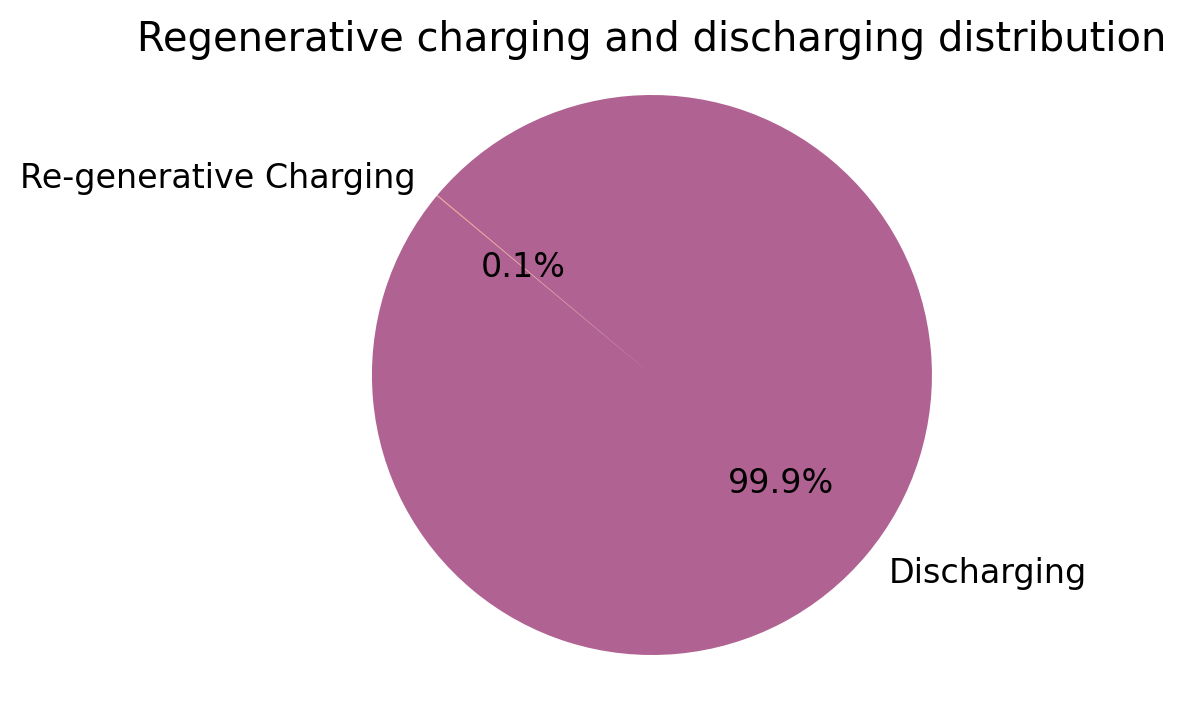

In [6]:
sns.reset_orig()
plt.rcdefaults()
plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 12

labels = ['Re-generative Charging', 'Discharging']
sizes = [tot_c, tot_d]  
colors = [ '#F68E5E', '#9C3B77']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={"alpha": 0.8})
plt.axis('equal')
plt.title('Regenerative charging and discharging distribution')
plt.show()

In [7]:
br_asser=0
br_def=0
for i_dr in range (len(data1)):
    if data1['Driver Type'].iloc[i_dr]== 1:
        br_asser= br_asser + (info_data_2['Number of brakes'].iloc[i_dr])
    if data1['Driver Type'].iloc[i_dr]== 2:
        br_def= br_def + (info_data_2['Number of brakes'].iloc[i_dr])
br_asser_2= round((br_asser/48), 2)
br_def_2= round((br_def/48), 2)

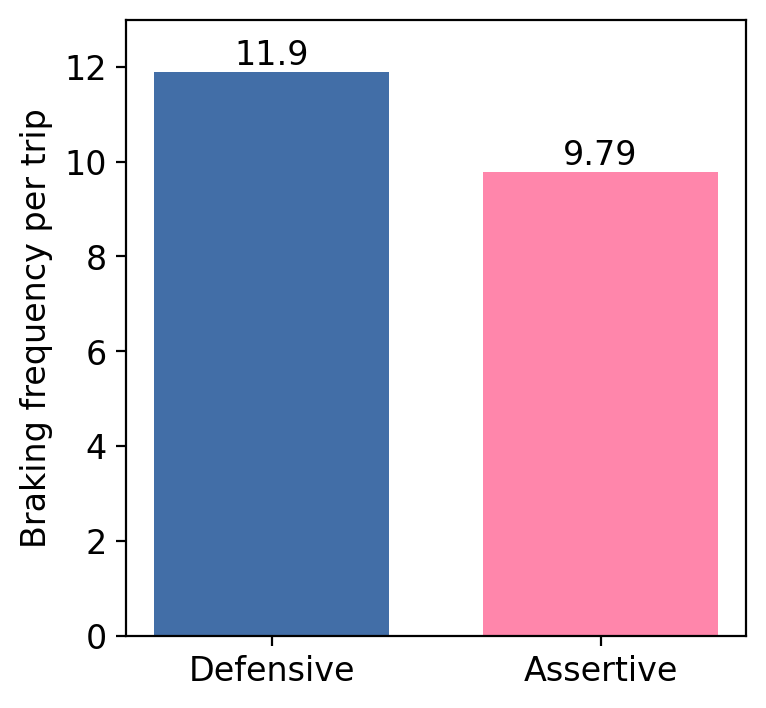

In [8]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.figure(figsize=(4, 4))

labels = ['Defensive', 'Assertive']
bar_width = 0.25
x_lim = [0.35, 0.70]
plt.bar(x_lim[0], br_def_2, width=bar_width, color='#023e8a', label='Defensive Drivers', alpha = 0.75)
plt.bar(x_lim[1], br_asser_2, width=bar_width, color='#ff5d8f', label='Assertive Drivers', alpha = 0.75)
plt.xticks(x_lim, labels)
plt.text(x_lim[0], br_def_2, str(br_def_2), ha='center', va='bottom')
plt.text(x_lim[1], br_asser_2, str(br_asser_2), ha='center', va='bottom')
# plt.title('Number of brakes per trip for Defensive & Assertive Drivers')
plt.ylabel('Braking frequency per trip')
plt.ylim(0, 13)
plt.show()

In [9]:
brt_asser=0
brt_def=0
for i_dr in range (len(data1)):
    if data1['Driver Type'].iloc[i_dr]== 1:
        brt_asser= brt_asser + (info_data_2['Total brake time'].iloc[i_dr])
    if data1['Driver Type'].iloc[i_dr]== 2:
        brt_def= brt_def + (info_data_2['Total brake time'].iloc[i_dr])
br_asser_2= round((brt_asser/48), 2)
br_def_2= round((brt_def/48), 2)

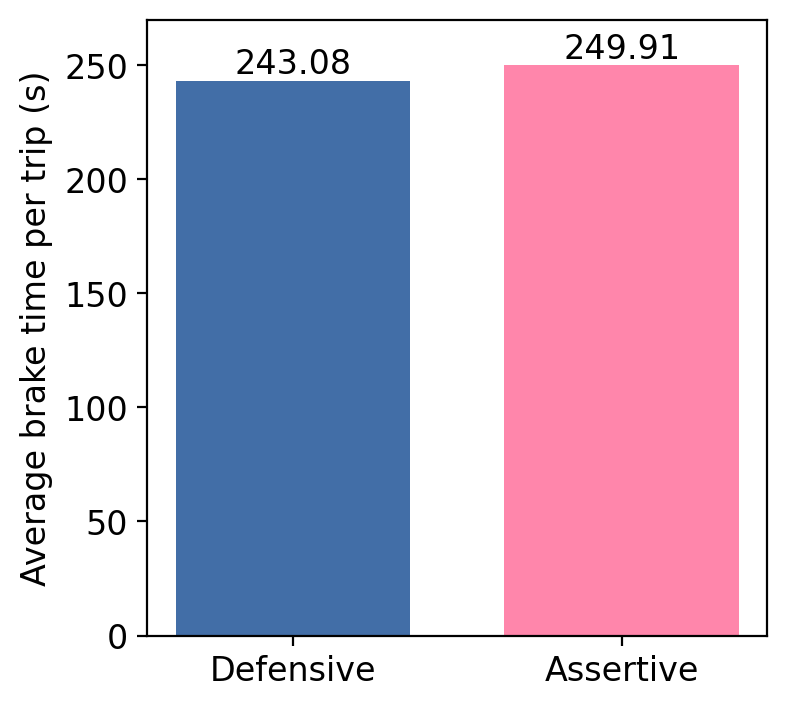

In [10]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.figure(figsize=(4, 4))

labels = ['Defensive', 'Assertive']
bar_width = 0.25
x_lim = [0.35, 0.70]
plt.bar(x_lim[0], br_def_2, width=bar_width, color='#023e8a', label='Defensive Drivers', alpha = 0.75)
plt.bar(x_lim[1], br_asser_2, width=bar_width, color='#ff5d8f',label='Assertive Drivers', alpha = 0.75)
plt.xticks(x_lim, labels)
plt.text(x_lim[0], br_def_2, str(br_def_2), ha='center', va='bottom')
plt.text(x_lim[1], br_asser_2, str(br_asser_2), ha='center', va='bottom')
# plt.title('Average time of brakes per trip for Defensive & Assertive Drivers')
# plt.xlabel('Driver type')
plt.ylabel('Average brake time per trip (s)')
plt.ylim(0, 270)
plt.show()

In [11]:
brt_asser=0
brt_def=0
for i_dr in range (len(data1)):
    if data1['Driver Type'].iloc[i_dr]== 1:
        brt_asser= brt_asser + (vel_info['Time Spent Decelerating (s)'].iloc[i_dr])
    if data1['Driver Type'].iloc[i_dr]== 2:
        brt_def= brt_def + (vel_info['Time Spent Decelerating (s)'].iloc[i_dr])
br_asser_2= round((brt_asser/48), 2)
br_def_2= round((brt_def/48), 2)

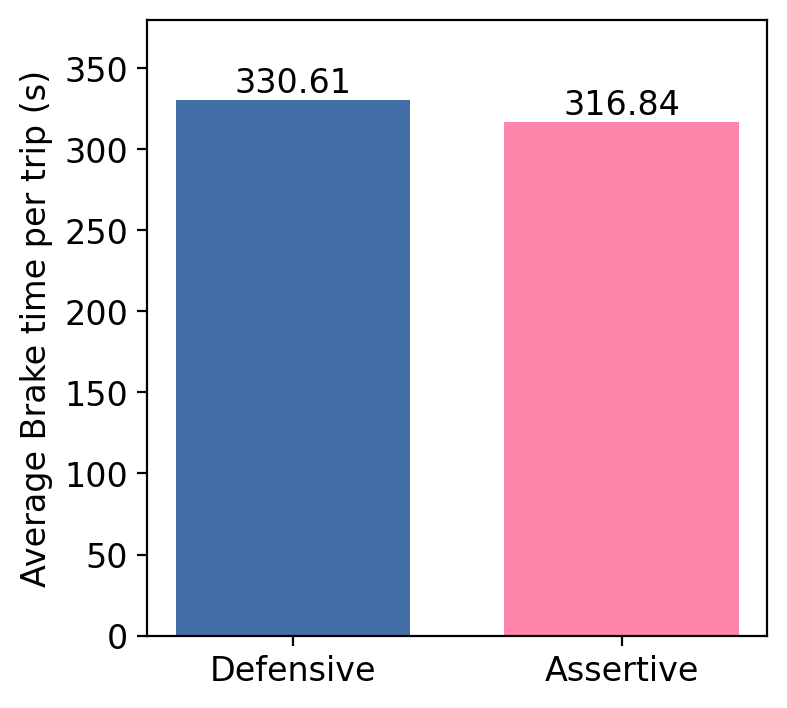

In [12]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.figure(figsize=(4,4))
# plt.rcParams['font.size'] = 12

labels = ['Defensive', 'Assertive']
bar_width = 0.25
x_lim = [0.35, 0.70]

plt.bar(x_lim[0], br_def_2, width=bar_width, color='#023e8a', label='Defensive Drivers', alpha = 0.75)
plt.bar(x_lim[1], br_asser_2, width=bar_width, color='#ff5d8f',label='Assertive Drivers', alpha = 0.75)
plt.xticks(x_lim, labels)
plt.text(x_lim[0], br_def_2, str(br_def_2), ha='center', va='bottom')
plt.text(x_lim[1], br_asser_2, str(br_asser_2), ha='center', va='bottom')
# plt.title('Average time of brakes per trip for Defensive & Assertive Drivers')
# plt.xlabel('Driver type')
plt.ylabel('Average Brake time per trip (s)')
plt.ylim(0, 380)
plt.show()

In [13]:
def dr_gen(foldername):
    folder_path = VEL_DATA_DIR / 'train'
    dr_def_dfs = []

    for file in folder_path.rglob('*.xlsx'):
        if foldername.lower() in file.parts[-2].lower(): 
            df = pd.read_excel(file)
            dr_def_dfs.append(df)
    
    return dr_def_dfs

In [14]:
def dr_gen_test():
    folder_path = VEL_DATA_DIR / 'test'
    dr_asser_dfs = []
    for file in os.listdir(folder_path):
        if file.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file)
            print(file_path)
            df = pd.read_excel(file_path)
            dr_asser_dfs.append(df)
    return dr_asser_dfs

In [15]:
test_drives = dr_gen_test()
len(test_drives)

/Users/hemanthnr/Desktop/Batt_patt_github_final/datasets/velocity_dataset/test/test_1_def.xlsx
/Users/hemanthnr/Desktop/Batt_patt_github_final/datasets/velocity_dataset/test/test_4_asser.xlsx
/Users/hemanthnr/Desktop/Batt_patt_github_final/datasets/velocity_dataset/test/test_3_def.xlsx
/Users/hemanthnr/Desktop/Batt_patt_github_final/datasets/velocity_dataset/test/test_2_asser.xlsx


4

In [16]:
def_df= dr_gen('Defensive')
asser_df= dr_gen('Assertive')

In [17]:
def vel_prob(df):
    c_5_arr=[]
    c_10_arr=[]
    c_15_arr=[]
    c_20_arr=[]
    c_25_arr=[]
    c_30_arr=[]
    for i in range (len(df)):
        c_5=0
        c_10=0
        c_15=0
        c_20=0
        c_25=0
        c_30=0
        for j in range (1, len(df[i])):
            if df[i]['speed'].iloc[j]<5:
                c_5=c_5+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
            if df[i]['speed'].iloc[j]<10 and df[i]['speed'].iloc[j]>=5:
                c_10=c_10+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
            if df[i]['speed'].iloc[j]<15 and df[i]['speed'].iloc[j]>=10:
                c_15=c_15+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
            if df[i]['speed'].iloc[j]<20 and df[i]['speed'].iloc[j]>=15:
                c_20=c_20+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
            if df[i]['speed'].iloc[j]<25 and df[i]['speed'].iloc[j]>=20:
                c_25=c_25+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
            if df[i]['speed'].iloc[j]>=25:
                c_30=c_30+((df[i]['time'].iloc[j])-(df[i]['time'].iloc[j-1]))
        c_5_arr.append(c_5)
        c_10_arr.append(c_10)
        c_15_arr.append(c_15)
        c_20_arr.append(c_20)
        c_25_arr.append(c_25)
        c_30_arr.append(c_30)
    sum_5= sum(c_5_arr)
    sum_10= sum(c_10_arr)
    sum_15= sum(c_15_arr)
    sum_20= sum(c_20_arr)
    sum_25= sum(c_25_arr)
    sum_30= sum(c_30_arr)
    p_5= sum_5/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    p_10= sum_10/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    p_15= sum_15/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    p_20= sum_20/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    p_25= sum_25/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    p_30= sum_30/(sum_5+sum_10+sum_15+sum_20+sum_25+sum_30)
    return p_5, p_10, p_15, p_20, p_25, p_30

[          time      speed
0     0.000000   0.000000
1    18.367347   1.309524
2    36.734694   2.619048
3    55.102041   3.928571
4    73.469388   5.238095
5    91.836735   6.547619
6   110.204082   7.857143
7   128.571429   9.166667
8   146.938776  10.476190
9   165.306122  11.785714
10  183.673469  13.095238
11  202.040816  14.404762
12  220.408163  15.714286
13  238.775510  17.023810
14  257.142857  18.333333
15  275.510204  19.642857
16  293.877551  20.952381
17  312.244898  24.336735
18  330.612245  24.591837
19  348.979592  24.846939
20  367.346939  24.387755
21  385.714286  22.857143
22  404.081633  21.326531
23  422.448980  24.620181
24  440.816327  23.854875
25  459.183673  23.089569
26  477.551020  22.324263
27  495.918367  22.290249
28  514.285714  23.650794
29  532.653061  25.011338
30  551.020408  22.908163
31  569.387755  23.588435
32  587.755102  24.268707
33  606.122449  24.523810
34  624.489796  23.928571
35  642.857143  23.333333
36  661.224490  23.656463
37  679.591

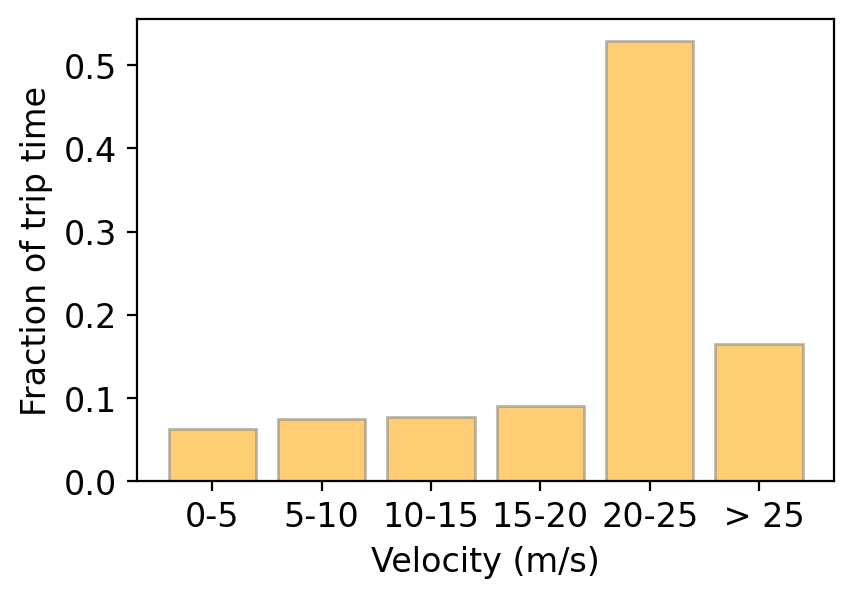

In [18]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4.5, 3)

asser_df= dr_gen('Assertive')
def_df= dr_gen('Defensive')
df_concat = asser_df+def_df+test_drives
print(df_concat)

a_2, b_2,c_2,d_2,e_2,f_2= vel_prob(df_concat)

values = [a_2, b_2, c_2, d_2, e_2, f_2]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', ' > 25']
plt.bar(labels, values, color='#09bc8a', ec = "grey", alpha = 0.55)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Fraction of trip time')
plt.show()

In [19]:
# values = [a, b, c, d, e, f]
# labels = ['0-5', '5-10', '10-15', '15-20', '20-25', 'Over 25']  

# plt.figure(figsize=(10, 6))
# plt.bar(labels, values, color='skyblue', edgecolor='black')

# plt.title('Bar Plot of Speed probabilities of Defensive Drivers used for data generation')
# plt.xlabel('Speed of the vehicle in m/s')
# plt.ylabel('Probability')
# plt.show()

In [20]:
# values = [u, v, w, x, y, z]
# labels = ['0-5', '5-10', '10-15', '15-20', '20-25', 'Over 25']  

# plt.figure(figsize=(10, 6))
# plt.bar(labels, values, color='lightcoral', edgecolor='black')

# plt.title('Bar Plot of Speed probabilities of Assertive Drivers used for data generation')
# plt.xlabel('Speed of the vehicle in m/s')
# plt.ylabel('Probability')
# plt.show()

In [21]:
# values_def = [a, b, c, d, e, f]
# values_asser = [u, v, w, x, y, z]
# labels = ['0-5', '5-10', '10-15', '15-20', '20-25', 'Over 25']
# bar_width = 0.35
# x = np.arange(len(labels))

# plt.figure(figsize=(10, 6))
# plt.bar(x - bar_width/2, values_def, width=bar_width, color='skyblue', edgecolor='black', label='Defensive Drivers')


# plt.bar(x + bar_width/2, values_asser, width=bar_width, color='lightcoral', edgecolor='black', label='Assertive Drivers')

# plt.title('Bar Plot of Speed Occurences for Defensive and Assertive Drivers')
# plt.xlabel('Speed of the vehicle in m/s')
# plt.ylabel('Fraction of total time the vehicle travelled')
# plt.xticks(x, labels) 
# plt.legend() 

# plt.show()

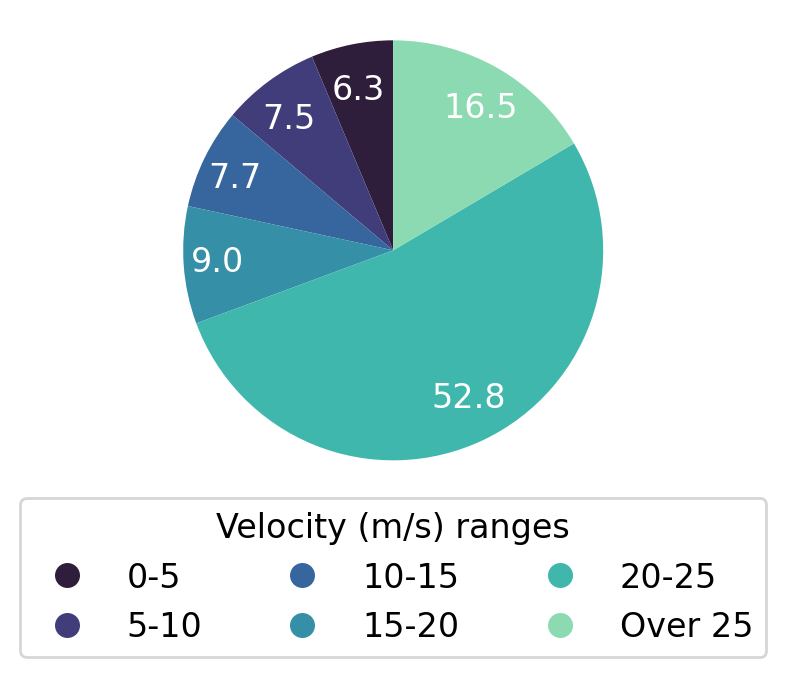

In [22]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4.5, 3)

values = [a_2, b_2, c_2, d_2, e_2, f_2]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', 'Over 25']
colors = sns.color_palette("mako", n_colors=len(values))

fig, ax = plt.subplots(figsize=(4, 3))

def remove_percentage_symbol(pct):
    return f"{pct:.1f}"

wedges, texts, autotexts = ax.pie(
    values, autopct=remove_percentage_symbol, startangle=90, colors=colors, textprops={'color': 'white'})

for autotext in autotexts:
    autotext.set_position((1.4 * autotext.get_position()[0], 1.3 * autotext.get_position()[1]))

ax.axis('equal') 
patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

legend = ax.legend(
    patches,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0),
    ncol=3,
    title="Velocity (m/s) ranges",
    frameon=True,
)

# fig.savefig('/Users/hemanthnr/Desktop/batt_patt figures/velocity_distribution_pie.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()

In [23]:
def find_dis_caps(df):
    y_vals= (df['Discharge Capacity (Ah)'].iloc[0])-(df['Discharge Capacity (Ah)'])
    x_vals= df['Step Time (s)']
    return x_vals, y_vals

In [24]:
def find_volts_curr(df):
    v_vals= df['Voltage (V)']
    c_vals= df['Current (A)']
    x_vals= df['Step Time (s)']
    return x_vals, c_vals, v_vals

In [25]:
# plt.figure(figsize=(8, 6))
# cmap = plt.cm.viridis
# n=0
# for key in dict.keys():
#     n=n+1
#     color = cmap(n/len(dict)) 
#     x_arr, y_arr= find_dis_caps(dict[key])
#     plt.plot(x_arr, y_arr, linewidth= 1, color=color)
# plt.xlabel('Step Time (s)', fontname= 'Arial', fontsize= 10)
# plt.ylabel('Discharge Capacity Drop (Ah)', fontname= 'Arial', fontsize= 10)
# plt.title('Discharge Capacity change during Simulated Mini Trip Battery Testing', fontname= 'Arial', fontsize= 10)
# sm = plt.cm.ScalarMappable(cmap=cmap)
# sm.set_array(range(1, len(dict)+1))
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation= 'vertical')
# cbar.set_label('Mini Trips', fontname= 'Arial', fontsize= 10)
# plt.show()


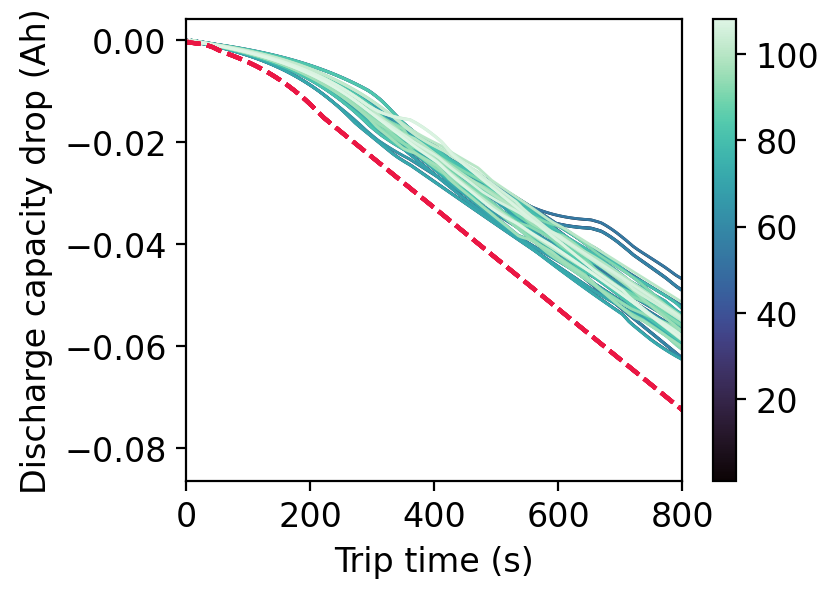

In [26]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(4, 3))

cmap = sns.color_palette("mako", as_cmap=True)

n = 0
for key in dict.keys():
    n += 1
    color = cmap(n / (len(dict) + len(dict_test)))
    x_arr, y_arr = find_dis_caps(dict[key])
    plt.plot(x_arr, y_arr, linewidth=1, color=color)

for key2 in dict_test.keys():
    n += 1
    color = cmap(n / (len(dict) + len(dict_test)))
    x_arr_2, y_arr_2 = find_dis_caps(dict_test[key2])
    plt.plot(x_arr_2, y_arr_2, linewidth=1, color=color)

for key3 in vel_test_dict.keys():
    n += 1
    x_arr_3, y_arr_3 = find_dis_caps(vel_test_dict[7])
    plt.plot(x_arr_3, y_arr_3, linestyle='--', linewidth=1.5, color='#ea1744')

plt.xlabel('Trip time (s)')
plt.ylabel('Discharge capacity drop (Ah)')
plt.xlim(0, 800)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(range(1, len(dict) + len(dict_test) + 1))
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
# cbar.set_label('Current profiles')

# fig.savefig(PLOT_DIR / 'discharge_capcity_drop.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()

In [27]:
from scipy.interpolate import interp1d
time_values, current_values, voltage_values= find_volts_curr(dict[30])
vel_val= def_df[1]['speed']
time_val = def_df[1]['time']
f = interp1d(time_val, vel_val, kind='linear', fill_value='extrapolate')
new_velocity_values = f(time_values)

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/303737823.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('Intialisation', xy=(120, 35), xytext=(170, 35),
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/303737823.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('Early prediction 1', xy=(325, 35), xytext=(375, 35),
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_93047/303737823.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('Early prediction 2', xy=(650, 35), xytext=(700, 35),


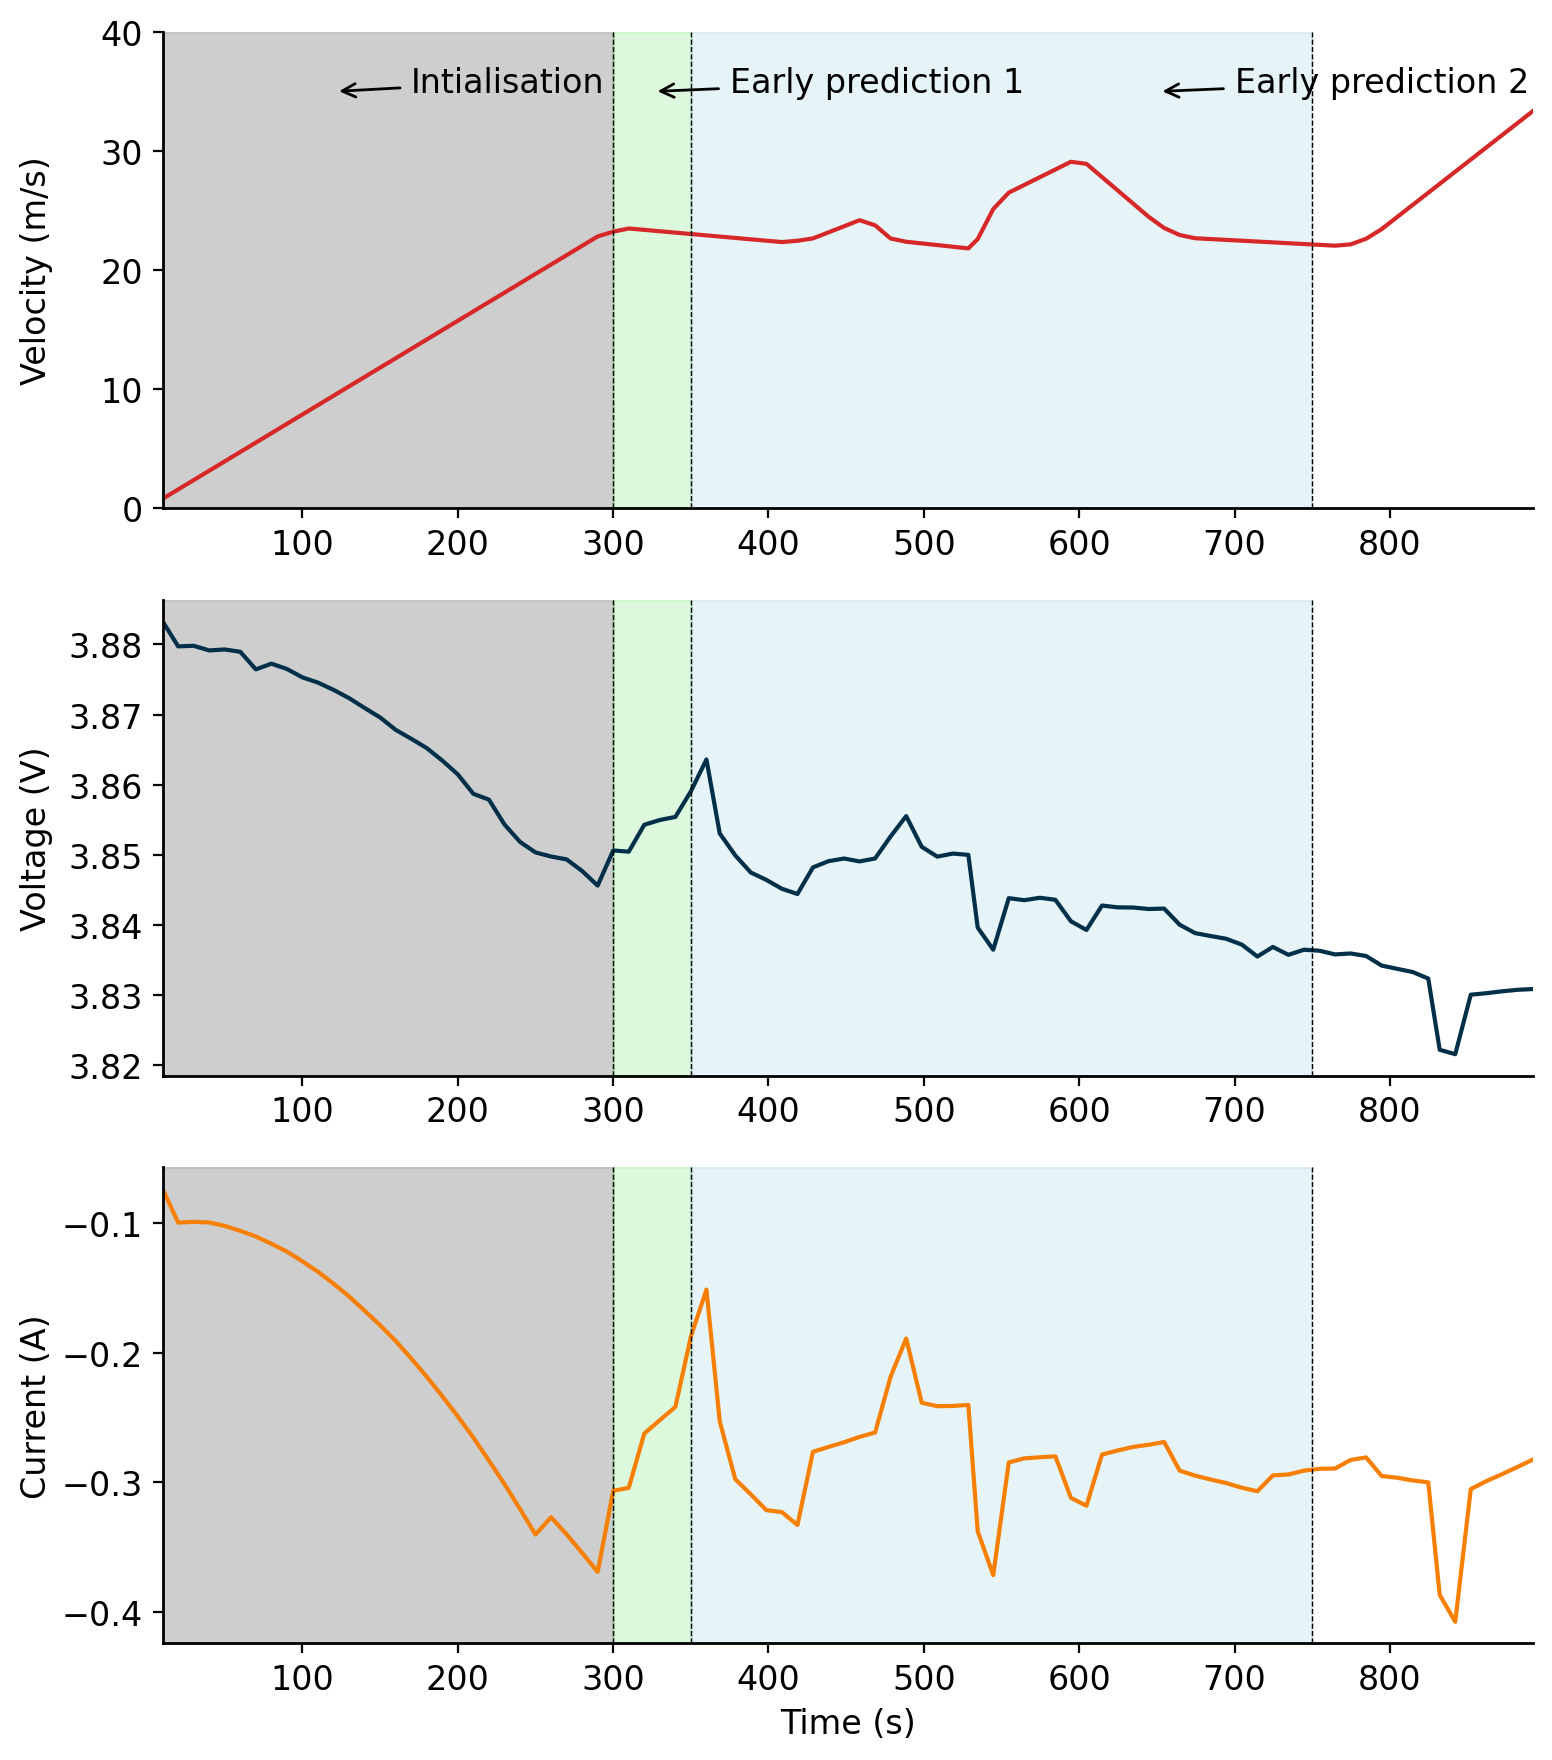

In [29]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, axs = plt.subplots(3, 1, figsize=(8, 9))

axs[0].plot(time_values, new_velocity_values, color='#d62828')
axs[0].axvspan(0, 300, color='grey', alpha=0.4)
axs[0].set_ylabel('Velocity (m/s)')
axs[0].set_ylim([0, 40])
axs[0].set_xlim([min(time_values), max(time_values)])

axs[1].plot(time_values, voltage_values, color='#003049')
axs[1].axvspan(0, 300, color='grey', alpha=0.4)
axs[1].set_ylabel('Voltage (V)')
axs[1].set_xlim([min(time_values), max(time_values)])

axs[2].plot(time_values, current_values, color='#f77f00')
axs[2].axvspan(0, 300, color='grey', alpha=0.4)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Current (A)')
axs[2].set_xlim([min(time_values), max(time_values)])

for ax in axs:
    ax.axvspan(0, 300, color = "lightgrey", alpha = 0.3, label = "Initialisation")
    ax.axvspan(300, 350, color='lightgreen', alpha=0.3, label="Early Prediction 1")
    ax.axvspan(350, 750, color='lightblue', alpha=0.3, label="Early Prediction 2")

axs[0].annotate('Intialisation', xy=(120, 35), xytext=(170, 35),
                arrowprops={'facecolor': 'black', 'arrowstyle': '->', 'color': 'black'})

axs[0].annotate('Early prediction 1', xy=(325, 35), xytext=(375, 35),
                arrowprops={'facecolor': 'black', 'arrowstyle': '->', 'color': 'black'})

axs[0].annotate('Early prediction 2', xy=(650, 35), xytext=(700, 35),
                arrowprops={'facecolor': 'black', 'arrowstyle': '->', 'color': 'black'})

# Adjust the position of y-axis labels manually for better alignment
for ax in axs:
    ax.yaxis.set_label_coords(-0.08, 0.5)  # Adjust the x-coord for y-axis label position

# # Customize grids, ticks, and spines for all axes
# for i, ax in enumerate(axs):
#     # Grid customization (apply the same style to all subplots)
#     ax.grid(color="grey", alpha=0.2, linestyle="--", linewidth=0.5)
    
    # Customize spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)  # Hide top and right spines
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_linewidth(1)   # Darken bottom and left spines
        ax.spines[spine].set_color("black")  # Set spine color to dark black

    # Tick customization
    if i < len(axs) - 1:  # For all but the bottom plot
        ax.tick_params(labelbottom=False, bottom=False)  # Hide x-axis ticks and labels
    ax.tick_params(which='both', direction='out', bottom=True, left=True)  # Keep y-axis ticks

    ax.axvline(300, color='black', linestyle='--', linewidth=0.5, label="Boundary at 300")
    ax.axvline(350, color='black', linestyle='--', linewidth=0.5, label="Boundary at 350")
    ax.axvline(750, color='black', linestyle='--', linewidth=0.5, label="Boundary at 750")

axs[-1].tick_params(labelbottom=True, bottom=True)
plt.tight_layout()
fig.savefig( PLOT_DIR / 'vel_curr_vol.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()

In [29]:
def get_vels(df):
    big_arr=[]
    for n in range(len(df)):
        arr= df[n]['speed']
        big_arr.append(arr)
    req_arr= np.array(big_arr)
    req_arr_2= np.concatenate(req_arr)
    mean_arr= np.mean(req_arr_2)
    return req_arr_2, mean_arr

In [ ]:
v1, mean_v1= get_vels(def_df)
v2, mean_v2= get_vels(asser_df)

xx= v2.mean()
xxx=v1.mean()
vel_mean= (xx+xxx)/2
vel_mean

In [ ]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4.5, 3)

plt.hist(v1, bins=25, density=True, color='#023e8a', label='Defensive Drivers', alpha = 0.75)
plt.hist(v2, bins=25, density=True, color='#ff5d8f', label='Assertive Drivers', alpha = 0.5)

plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4.5, 3)

arr_soc_drop_rel =  np.array(info_data_2['Relative_SOC_drop'])
sns.histplot(data=info_data_2, x=arr_soc_drop_rel, bins=15, kde=True, color='orange', edgecolor = "grey", alpha = 0.5)
plt.xlabel('Charge usage score')
plt.ylabel('Probability Density')
plt.show()

In [33]:
max_soc= (info_data_2['SOC_drop (%)']).max()
min_soc= (info_data_2['SOC_drop (%)']).min()

zz= np.linspace(max_soc, min_soc, 6)

In [34]:
def soc_prob(df, num):
    c_5=0
    c_10=0
    c_15=0
    c_20=0
    c_25=0
    c_30=0
    for j in range (0, len(df)):
        if data1['Driver Type'].iloc[j] == num:
            if df['SOC_drop (%)'].iloc[j]<=zz[0] and df['SOC_drop (%)'].iloc[j]>zz[1]:
                c_10=c_10+1
            if df['SOC_drop (%)'].iloc[j]<=zz[1] and df['SOC_drop (%)'].iloc[j]>zz[2]:
                c_15=c_15+1
            if df['SOC_drop (%)'].iloc[j]<=zz[2] and df['SOC_drop (%)'].iloc[j]>zz[3]:
                c_20=c_20+1
            if df['SOC_drop (%)'].iloc[j]<=zz[3] and df['SOC_drop (%)'].iloc[j]>zz[4]:
                c_25=c_25+1
            if df['SOC_drop (%)'].iloc[j]<=zz[4] and df['SOC_drop (%)'].iloc[j]>=zz[5]:
                c_30=c_30+1

    return c_10, c_15, c_20, c_25, c_30

In [35]:
a, b, c, d, e= soc_prob(info_data_2, 1)
u, v, w, x, y= soc_prob(info_data_2, 2)

In [ ]:
values_def = [a, b, c, d, e]
values_asser = [u, v, w, x, y]
labels = ['1.6-1.77%', '1.77-1.92%', '1.92-2.06%', '2.06-2.21%', '2.21-2.35%'] 
bar_width = 0.35
x = np.arange(len(labels))

sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 4)
plt.bar(x - bar_width/2, values_def, width=bar_width, color='#023e8a', label='Defensive Drivers', alpha = 0.75)
plt.bar(x + bar_width/2, values_asser, width=bar_width, color='#ff5d8f', label='Assertive Drivers', alpha = 0.75)
plt.xlabel('SOC Drop (%)')
plt.ylabel('Data distrubution among drivers')
plt.xticks(x, labels) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()